In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_cap = pd.read_csv("HR_Employee_Attrition_Data.csv")

# Data preprocessing

In [3]:
#Checking for unwanted columns
print("EmployeeCount unique values::", data_cap['EmployeeCount'].unique())
print("Over18 unique values::",data_cap['Over18'].unique())
print("StandardHours unique values::",data_cap['StandardHours'].unique())
#There is only one value for above column hence dropping it as they will not affect our model


EmployeeCount unique values:: [1]
Over18 unique values:: ['Y']
StandardHours unique values:: [80]


In [4]:
data_cap.drop(columns = ['EmployeeCount', 'Over18','StandardHours', 'EmployeeNumber'], inplace = True)

In [5]:
col=data_cap.columns.tolist()

In [6]:
data_cap.shape

(2940, 31)

### Converting labels to nominal data

In [7]:
#Converting 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole'
#'MaritalStatus', 'overtime'
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc,confusion_matrix
import numpy as np

In [29]:

def labelencoder(df):
    temp_df = df.copy()
    le={}
    for i in ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]:
    
        le[i] = preprocessing.LabelEncoder()

        temp_df[i] = le[i].fit_transform(temp_df[i])
        
    return temp_df,le

encoded_cap_data,enc = labelencoder(data_cap)


In [9]:
encoded_cap_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [10]:
data_cap.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
#Segregating the Independent and the dependant variable
y = encoded_cap_data["Attrition"].values
X = encoded_cap_data.drop(["Attrition"],axis =1)

In [12]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2)


In [13]:
X_train.shape

(2352, 30)

In [14]:
#Build the decision tree model with tree size 50
model_HR = RandomForestClassifier(n_estimators = 50, random_state = 0)
model_HR.fit(X_train, y_train)
model_HR_score_train = model_HR.score(X_train, y_train)
print("Training score: ",model_HR_score_train)
model_HR_score_test = model_HR.score(X_test, y_test)
print("Testing score: ",model_HR_score_test)


Training score:  0.9995748299319728
Testing score:  0.9506802721088435


In [15]:
#caluclating the probabilities for the AUC curve
#Decision treemodel_dt_2
y_pred_prob = model_HR.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.22, 0.02, 0.04, 0.04, 0.04, 0.66, 0.04, 0.02, 0.66, 0.04, 0.02,
       0.04, 0.76, 0.62, 0.06, 0.08, 0.02, 0.  , 0.64, 0.06, 0.48, 0.14,
       0.08, 0.08, 0.04, 0.06, 0.82, 0.  , 0.  , 0.06, 0.04, 0.  , 0.82,
       0.1 , 0.04, 0.08, 0.24, 0.02, 0.08, 0.1 , 0.02, 0.08, 0.08, 0.04,
       0.  , 0.  , 0.08, 0.88, 0.  , 0.62, 0.1 , 0.62, 0.76, 0.  , 0.  ,
       0.94, 0.14, 0.02, 0.08, 0.96, 0.12, 0.06, 0.06, 0.04, 0.04, 0.  ,
       0.84, 0.82, 0.02, 0.  , 0.12, 0.02, 0.06, 0.1 , 0.04, 0.1 , 0.76,
       0.02, 0.22, 0.08, 0.08, 0.74, 0.18, 0.06, 0.08, 0.06, 0.  , 0.56,
       0.02, 0.04, 0.08, 0.  , 0.  , 0.2 , 0.78, 0.08, 0.6 , 0.12, 0.14,
       0.1 , 0.14, 0.  , 0.26, 0.02, 0.02, 0.  , 0.26, 0.02, 0.04, 0.08,
       0.06, 0.02, 0.12, 0.18, 0.04, 0.04, 0.68, 0.06, 0.1 , 0.02, 0.72,
       0.  , 0.14, 0.08, 0.04, 0.06, 0.74, 0.04, 0.  , 0.04, 0.  , 0.04,
       0.06, 0.04, 0.02, 0.02, 0.04, 0.14, 0.04, 0.04, 0.  , 0.06, 0.02,
       0.94, 0.06, 0.3 , 0.58, 0.  , 0.02, 0.72, 0.

In [16]:
#Predicting the Attrition for X_test
y_pred = model_HR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

### Performance metrics

In [17]:
# Model Accuracy:
print ("Model Accuracy is::", (model_HR.score(X_test, y_test))*100)
# Recall
print("Model recall is::", (recall_score(y_test, y_pred))*100)

Model Accuracy is:: 95.06802721088435
Model recall is:: 75.96153846153845


In [18]:
#Area under the curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

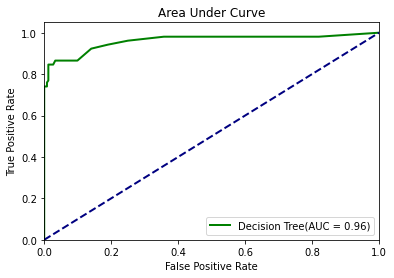

In [19]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
#Printing confusion matrix
print (confusion_matrix(y_test, y_pred))

[[480   4]
 [ 25  79]]


In [21]:
import itertools
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Stayed", "Left"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

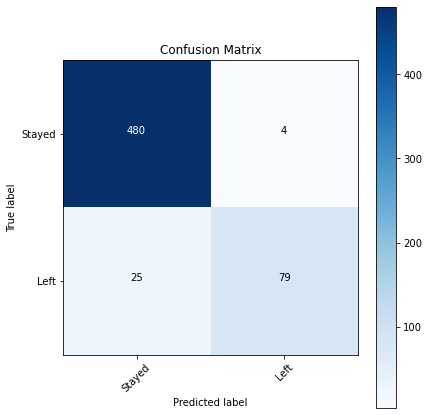

In [22]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred, normalize=False)
plt.show()

Feature ranking:
1. feature 15 (0.083184)
2. feature 0 (0.060843)
3. feature 18 (0.060818)
4. feature 2 (0.057380)
5. feature 23 (0.054643)
6. feature 4 (0.048178)
7. feature 16 (0.047827)
8. feature 9 (0.047070)
9. feature 26 (0.040802)
10. feature 19 (0.039606)
11. feature 17 (0.032792)
12. feature 29 (0.032148)
13. feature 7 (0.030450)
14. feature 12 (0.029842)
15. feature 10 (0.028147)
16. feature 28 (0.027385)
17. feature 6 (0.026312)
18. feature 24 (0.024885)
19. feature 11 (0.024884)
20. feature 25 (0.024821)
21. feature 14 (0.024738)
22. feature 13 (0.024454)
23. feature 21 (0.023415)
24. feature 27 (0.022435)
25. feature 22 (0.021069)
26. feature 5 (0.019802)
27. feature 3 (0.014778)
28. feature 1 (0.014334)
29. feature 8 (0.007910)
30. feature 20 (0.005048)


Text(0.5, 0, 'index of the feature')

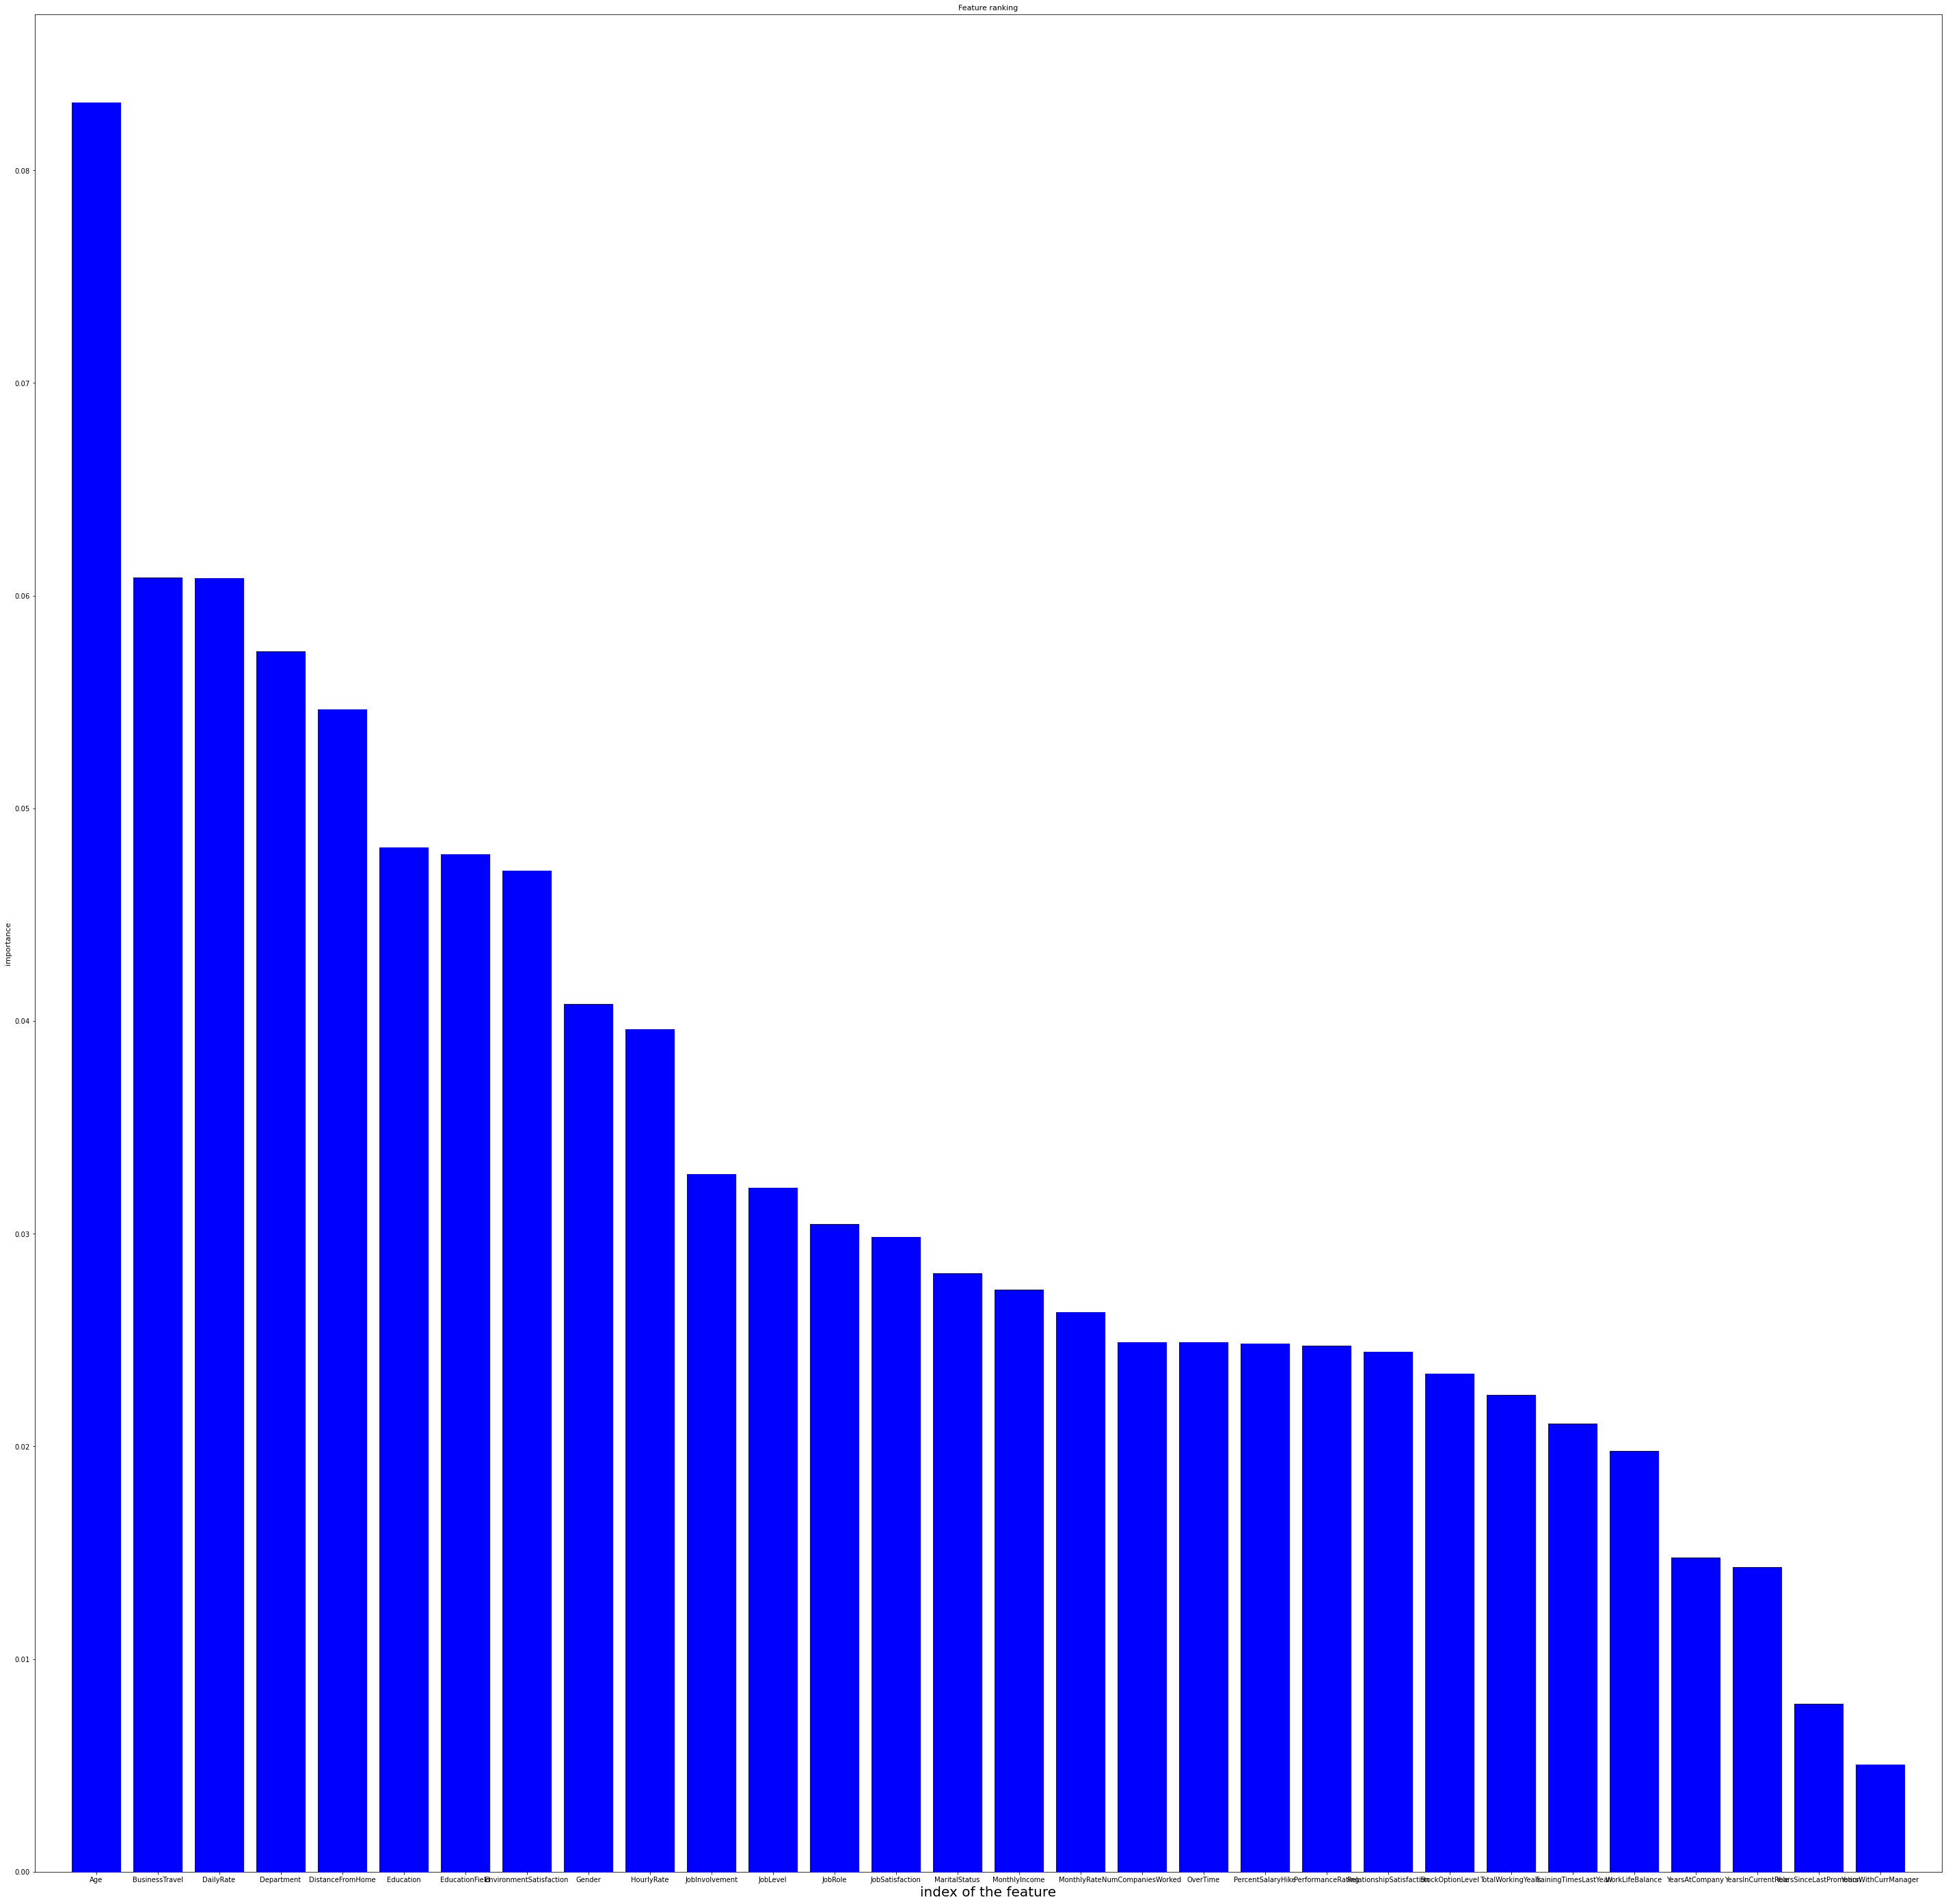

In [23]:
importances= model_HR.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
f, ax = plt.subplots(figsize=(50,50))
plt.title("Feature ranking", fontsize = 11)
plt.bar(range(X_train.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance", fontsize = 11)
plt.xlabel("index of the feature", fontsize = 20)

In [24]:
import joblib
joblib.dump(model_HR,"attrition.pkl")

['attrition.pkl']

In [33]:
joblib.dump(col,"attribute.pkl")

['attribute.pkl']

In [34]:
joblib.dump(enc,"encoding.pkl")

['encoding.pkl']